In [1]:
# Material from
# https://www.datacamp.com/community/tutorials/python-excel-tutorial
# To install xlwt follow: https://gitlab.cern.ch/swan/help/blob/master/advanced/install_packages.md

In [2]:
# Import `xlwt` 
import xlwt
import xlrd
import numpy as np
import time
import matplotlib.pyplot as plt
import xlsxwriter
import utils
import datetime

# Global variables

In [3]:
nameMagnet = 'MQ_1aperture'

# Define style for plots
selectedFont = {'fontname':'DejaVu Sans', 'size':14}

# Field maps from ROXIE

Total number of strands in the field-map from ROXIE = 6912


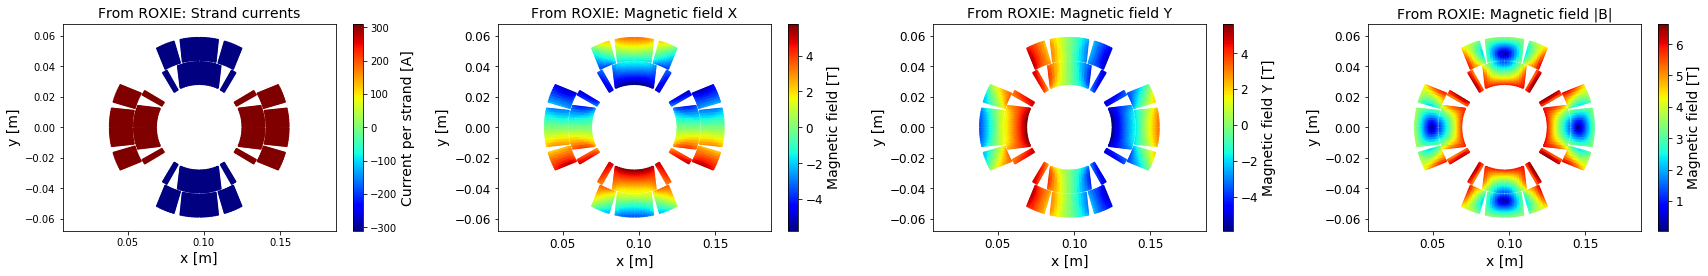

In [4]:
# Acquire data from ROXIE .map2d file
fileName = nameMagnet + '_All_WithIron_WithSelfField.map2d'
headerLines = 1

strandToConductorBlock = np.array([])
strandToHalfTurn = np.array([])
idx = []
x = []
y = []
Bx = []
By = []
Area = []
I = []
fillFactor = []

# Read file
file = open(fileName, "r")
fileContent = file.read()

# Separate rows
fileContentByRow = fileContent.split("\n")

for index in range(len(fileContentByRow)-1):
    if index>headerLines:
        fc = fileContentByRow[index]
        row = fc.split()
#         print(index)
#         print(row)
        strandToConductorBlock = np.hstack([strandToConductorBlock,int(row[0])])
        strandToHalfTurn = np.hstack([strandToHalfTurn,int(row[1])])
        idx = np.hstack([idx,float(row[2])])
        x = np.hstack([x,float(row[3])/1000]) # in [m]
        y = np.hstack([y,float(row[4])/1000]) # in [m]
        Bx = np.hstack([Bx,float(row[5])])
        By = np.hstack([By,float(row[6])])
        Area = np.hstack([Area,float(row[7])])
        I = np.hstack([I,float(row[8])])
        fillFactor = np.hstack([fillFactor,float(row[9])])

nStrandsFieldMap = len(strandToConductorBlock)
print('Total number of strands in the field-map from ROXIE = ' + str(nStrandsFieldMap))

# Calculate absolute magnetic field
B = []
for i in range(nStrandsFieldMap):
    B = np.hstack([B, (Bx[i]**2+By[i]**2)**.5 ])

# Plot strand currents and magnetic field
f = plt.figure(figsize=(24,4))
plt.subplot(1, 4, 1 )
plt.scatter(x, y, s=2, c=I)
plt.xlabel('x [m]',**selectedFont)
plt.ylabel('y [m]',**selectedFont)
plt.title('From ROXIE: Strand currents',**selectedFont)
plt.set_cmap('jet')
cbar = plt.colorbar()
cbar.set_label('Current per strand [A]',**selectedFont)
plt.rcParams.update({'font.size': 12})
plt.axis('equal')

plt.subplot(1, 4, 2)
plt.scatter(x, y, s=2, c=Bx)
plt.xlabel('x [m]',**selectedFont)
plt.ylabel('y [m]',**selectedFont)
plt.title('From ROXIE: Magnetic field X',**selectedFont)
plt.set_cmap('jet')
cbar = plt.colorbar()
cbar.set_label('Magnetic field [T]',**selectedFont)
plt.rcParams.update({'font.size': 12})
plt.axis('equal')

plt.subplot(1, 4, 3)
plt.scatter(x, y, s=2, c=By)
plt.xlabel('x [m]',**selectedFont)
plt.ylabel('y [m]',**selectedFont)
plt.title('From ROXIE: Magnetic field Y',**selectedFont)
plt.set_cmap('jet')
cbar = plt.colorbar()
cbar.set_label('Magnetic field Y [T]',**selectedFont)
plt.rcParams.update({'font.size': 12})
plt.axis('equal')

plt.subplot(1, 4, 4)
plt.scatter(x, y, s=2, c=B)
plt.xlabel('x [m]',**selectedFont)
plt.ylabel('y [m]',**selectedFont)
plt.title('From ROXIE: Magnetic field |B|',**selectedFont)
plt.set_cmap('jet')
cbar = plt.colorbar()
cbar.set_label('Magnetic field [T]',**selectedFont)
plt.rcParams.update({'font.size': 12})
plt.axis('equal')

plt.tight_layout()

# Manipulate imported strand positions

Total number of strands = 6912
Total number of half-turns = 192
Total number of turns = 96


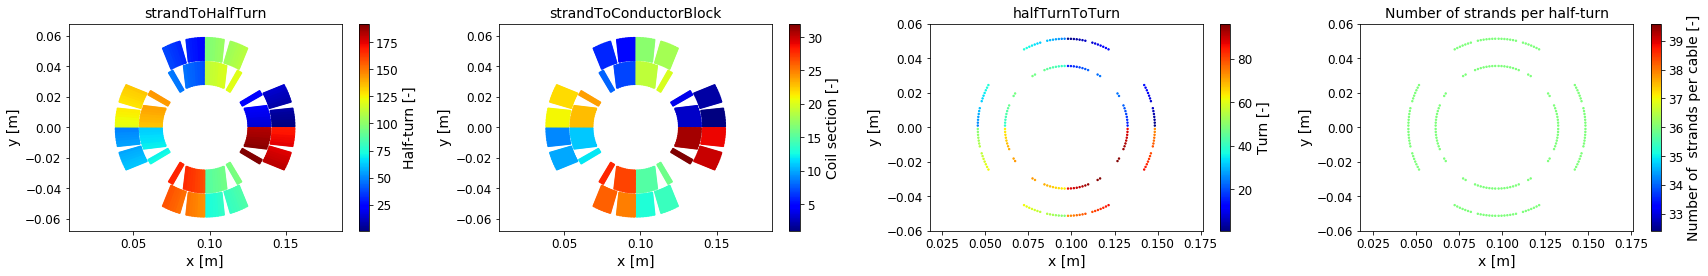

In [5]:
# Number of strands in each half-turn
nStrands = len(strandToConductorBlock)
polarities = np.sign(I);
nHalfTurns = int(np.max(strandToHalfTurn));
nTurns = int(nHalfTurns/2)
nS = []
for ht in range(1,nHalfTurns+1):
    #nS =sum(strandToHalfTurn==ht);
    nS = np.hstack([ nS, np.size(np.where(strandToHalfTurn==ht)) ]) # Number of strands in each half-turn
nS = np.int_(nS)

strandToConductorBlock = np.int_(strandToConductorBlock)
strandToHalfTurn = np.int_(strandToHalfTurn)
halfTurnToTurn=np.tile(np.arange(1,nTurns+1),2);

# Average half-turn positions
x_ave = []
y_ave = []
for ht in range(1,nHalfTurns+1):
    x_ave = np.hstack([ x_ave, np.mean( x[np.where(strandToHalfTurn==ht)] )])
    y_ave = np.hstack([ y_ave, np.mean( y[np.where(strandToHalfTurn==ht)] )])
    
print('Total number of strands = ' + str(nStrands))
print('Total number of half-turns = ' + str(nHalfTurns))
print('Total number of turns = ' + str(nTurns))


# Plot strand currents and magnetic field
f = plt.figure(figsize=(24,4))
plt.subplot(1, 4, 1 )
plt.scatter(x, y, s=2, c=strandToHalfTurn)
plt.xlabel('x [m]',**selectedFont)
plt.ylabel('y [m]',**selectedFont)
plt.title('strandToHalfTurn',**selectedFont)
plt.set_cmap('jet')
cbar = plt.colorbar()
cbar.set_label('Half-turn [-]',**selectedFont)
plt.rcParams.update({'font.size': 12})
plt.axis('equal')

plt.subplot(1, 4, 2)
plt.scatter(x, y, s=2, c=strandToConductorBlock)
plt.xlabel('x [m]',**selectedFont)
plt.ylabel('y [m]',**selectedFont)
plt.title('strandToConductorBlock',**selectedFont)
plt.set_cmap('jet')
cbar = plt.colorbar()
cbar.set_label('Coil section [-]',**selectedFont)
plt.rcParams.update({'font.size': 12})
plt.axis('equal')

plt.subplot(1, 4, 3)
plt.scatter(x_ave, y_ave, s=2, c=halfTurnToTurn)
plt.xlabel('x [m]',**selectedFont)
plt.ylabel('y [m]',**selectedFont)
plt.title('halfTurnToTurn',**selectedFont)
plt.set_cmap('jet')
cbar = plt.colorbar()
cbar.set_label('Turn [-]',**selectedFont)
plt.rcParams.update({'font.size': 12})
plt.axis('equal')

plt.subplot(1, 4, 4)
plt.scatter(x_ave, y_ave, s=2, c=nS)
plt.xlabel('x [m]',**selectedFont)
plt.ylabel('y [m]',**selectedFont)
plt.title('Number of strands per half-turn',**selectedFont)
plt.set_cmap('jet')
cbar = plt.colorbar()
cbar.set_label('Number of  strands per cable [-]',**selectedFont)
plt.rcParams.update({'font.size': 12})
plt.axis('equal')

plt.tight_layout()


# Load default LEDET options

In [6]:
# Read variable names and descriptions
workbookVariables = xlrd.open_workbook('variableNamesDescriptions.xlsx')

# Load "Inputs" sheet
worksheetInputs = workbookVariables.sheet_by_name('Inputs')
variablesInputs = {}
for i in range(worksheetInputs.nrows):
    variablesInputs[str(worksheetInputs.cell(i, 1).value)] = str(worksheetInputs.cell(i, 0).value)

# Load "Options" sheet
worksheetOptions = workbookVariables.sheet_by_name('Options')
variablesOptions = {}
for i in range(worksheetOptions.nrows):
    variablesOptions[str(worksheetOptions.cell(i, 1).value)] = str(worksheetOptions.cell(i, 0).value)

# Load "Plots" sheet
worksheetPlots = workbookVariables.sheet_by_name('Plots')
variablesPlots = {}
for i in range(worksheetPlots.nrows):
    variablesPlots[str(worksheetPlots.cell(i, 1).value)] = str(worksheetPlots.cell(i, 0).value)

# Load "Variables" sheet
worksheetVariables = workbookVariables.sheet_by_name('Variables')
variablesVariables = {}
for i in range(worksheetVariables.nrows):
    variablesVariables[str(worksheetVariables.cell(i, 1).value)] = str(worksheetVariables.cell(i, 0).value)

# Overall magnet variables

In [7]:
T00 = 1.9
l_magnet = 3.10
I00 = 10351

# Definition of groups of conductors

In [8]:
GroupToCoilSection = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
polarities_inGroup = [1,1,1,1,-1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1]

# Count number of groups defined
nCoilSectionsDefined = np.max(GroupToCoilSection)
nGroupsDefined = len(GroupToCoilSection)

print(str(nCoilSectionsDefined) + ' coil sections defined.')
print(str(nGroupsDefined) + ' groups defined.')

1 coil sections defined.
32 groups defined.


# Conductor properties in each group

In [9]:
# Number of half-turns in each group
nT = [7,7,8,2,7,7,8,2,7,7,8,2,7,7,8,2,7,7,8,2,7,7,8,2,7,7,8,2,7,7,8,2]
# Number of strands in each cable belonging to a particular group
nStrands_inGroup = nGroups * [36]
# length of each half turn [m] (default=l_magnet)
l_mag_inGroup = nGroups * [l_magnet]
# strand diameter [m]
ds_inGroup = nGroups * [0.825E-3]
# fraction of superconductor in the strands
f_SC_strand_inGroup = nGroups * [1/(1+1.95)]
# Effective transverse resistivity parameter (default=1)
f_ro_eff_inGroup = nGroups * [1]
# Filament twist-pitch [m]
Lp_f_inGroup = nGroups * [0.015]
# RRR of the conductor in each group of cables
RRR_Cu_inGroup = nGroups * [100/1.09]
# type of superconductor (1=Nb-Ti, 2=Nb3Sn, 3=BSCCO2212)
SCtype_inGroup = nGroups * [1]
# type of stabilizer (1=Cu, 2=Ag)
STtype_inGroup = nGroups * [1]
# Type of cable insulation (1=G10, 2=kapton)
insulationType_inGroup = nGroups * [2]
# Type of filler of voids between adjacent strands (1=G10, 2=kapton, 3=helium, 4=void)
internalVoidsType_inGroup = nGroups * [3]
# Type of filler of voids between strands and insulation layesrs (1=G10, 2=kapton, 3=helium, 4=void)
externalVoidsType_inGroup = nGroups * [2]
# bare cable width [m]
wBare_inGroup = nGroups * [1.51E-2]
# bare average cable height [m]
hBare_inGroup = nGroups * [1.48E-3]
# insulation thickness in the width direction [m]
wIns_inGroup = nGroups * [1.10E-4]
# insulation thickness in the height direction [m]
hIns_inGroup = nGroups * [1.30E-4]
# Strand twist-pitch [m]
Lp_s_inGroup = nGroups * [1.0E-1]
# Cross-contact resistance [Ohm]
R_c_inGroup = nGroups * [1.0E-4]
# Tc0_NbTi_ht_inGroup [K]
Tc0_NbTi_ht_inGroup = nGroups * [9.2]
# Bc2_NbTi_ht_inGroup [T]
Bc2_NbTi_ht_inGroup = nGroups * [14.5]
# c1_Ic_NbTi_inGroup [A]
c1_Ic_NbTi_inGroup = nGroups * [65821.9094012136]
# c2_Ic_NbTi_inGroup [A/T]
c2_Ic_NbTi_inGroup = nGroups * [-5042.61815657933]
# Tc0_Nb3Sn [K]
Tc0_Nb3Sn_inGroup = nGroups * [0]
# Bc2_Nb3Sn [T]
Bc2_Nb3Sn_inGroup = nGroups * [0]
# Jc_Nb3Sn0 [A*T^0.5/m^2] Based on short-sample measurements
Jc_Nb3Sn0_inGroup = nGroups * [0.0]

nHalfTurnsDefined = np.sum(nT)
print(str(nHalfTurnsDefined) + ' half-turns defined.')
print('')
#  Scale up or down the contribution of heat exchange through the short side of the cables (useful to change the insulation between coil layers
insulationBetweenLayers = 500E-6
insulationAroundCables = 130E-6
fScaling_Pex_AlongHeight_Defined = (2*insulationAroundCables)/(2*insulationAroundCables + insulationBetweenLayers)
print('fScaling_Pex_AlongHeight_Defined = ')
print(fScaling_Pex_AlongHeight_Defined)

192 half-turns defined.

fScaling_Pex_AlongHeight_Defined = 
0.3421052631578947


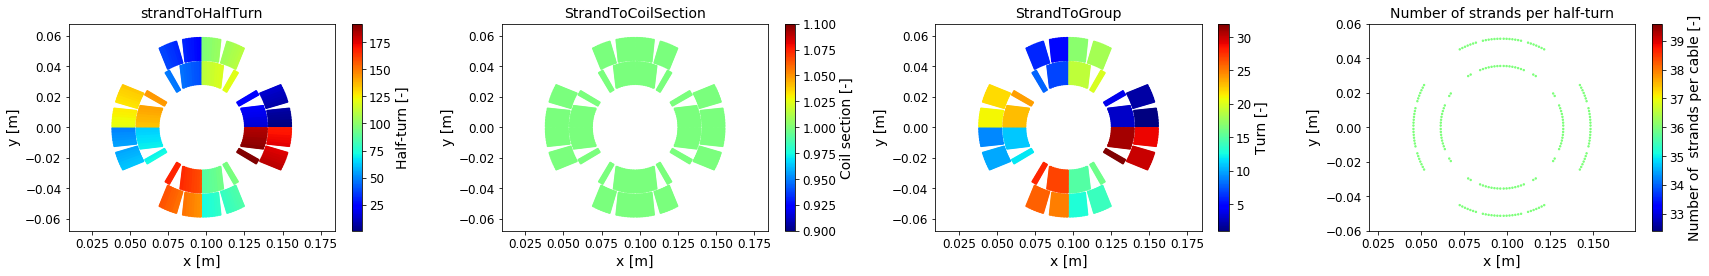

In [10]:
# Calculate group to which each half-turn belongs
indexTstart = np.hstack([1, 1+np.cumsum(nT[:-1])]);
indexTstop = np.cumsum(nT);
HalfTurnToGroup = np.zeros((1, nHalfTurnsDefined), dtype=int)
HalfTurnToGroup = HalfTurnToGroup[0]
HalfTurnToCoilSection = np.zeros((1, nHalfTurnsDefined), dtype=int)
HalfTurnToCoilSection = HalfTurnToCoilSection[0]
for g in range(1,nGroupsDefined+1):
    HalfTurnToGroup[indexTstart[g-1]-1:indexTstop[g-1]] = g
    HalfTurnToCoilSection[indexTstart[g-1]-1:indexTstop[g-1]]=GroupToCoilSection[g-1]
    
# Calculate group to which each strand belongs
indexSstart = np.hstack([1, 1+np.cumsum(nS[:-1])]);
indexSstop = np.cumsum(nS);
StrandToGroup = np.zeros((1, nStrands), dtype=int)
StrandToGroup = StrandToGroup[0]
StrandToCoilSection = np.zeros((1, nStrands), dtype=int)
StrandToCoilSection = StrandToCoilSection[0]
for ht in range(1,nHalfTurnsDefined+1):
    StrandToGroup[indexSstart[ht-1]-1:indexSstop[ht-1]] = HalfTurnToGroup[ht-1]
    StrandToCoilSection[indexSstart[ht-1]-1:indexSstop[ht-1]]=HalfTurnToCoilSection[ht-1]
    
# Plot strand currents and magnetic field
f = plt.figure(figsize=(24,4))
plt.subplot(1, 4, 1 )
plt.scatter(x, y, s=2, c=strandToHalfTurn)
plt.xlabel('x [m]',**selectedFont)
plt.ylabel('y [m]',**selectedFont)
plt.title('strandToHalfTurn',**selectedFont)
plt.set_cmap('jet')
cbar = plt.colorbar()
cbar.set_label('Half-turn [-]',**selectedFont)
plt.rcParams.update({'font.size': 12})
plt.axis('equal')

plt.subplot(1, 4, 2)
plt.scatter(x, y, s=2, c=StrandToCoilSection)
plt.xlabel('x [m]',**selectedFont)
plt.ylabel('y [m]',**selectedFont)
plt.title('StrandToCoilSection',**selectedFont)
plt.set_cmap('jet')
cbar = plt.colorbar()
cbar.set_label('Coil section [-]',**selectedFont)
plt.rcParams.update({'font.size': 12})
plt.axis('equal')

plt.subplot(1, 4, 3)
plt.scatter(x, y, s=2, c=StrandToGroup)
plt.xlabel('x [m]',**selectedFont)
plt.ylabel('y [m]',**selectedFont)
plt.title('StrandToGroup',**selectedFont)
plt.set_cmap('jet')
cbar = plt.colorbar()
cbar.set_label('Turn [-]',**selectedFont)
plt.rcParams.update({'font.size': 12})
plt.axis('equal')

plt.subplot(1, 4, 4)
plt.scatter(x_ave, y_ave, s=2, c=nS)
plt.xlabel('x [m]',**selectedFont)
plt.ylabel('y [m]',**selectedFont)
plt.title('Number of strands per half-turn',**selectedFont)
plt.set_cmap('jet')
cbar = plt.colorbar()
cbar.set_label('Number of  strands per cable [-]',**selectedFont)
plt.rcParams.update({'font.size': 12})
plt.axis('equal')

plt.tight_layout()

# Electrical order of the half-turns

The half-turns of these pairs of groups will be connected electrically:
[[15, 31], [16, 32], [14, 30], [13, 29], [25, 9], [26, 10], [28, 12], [27, 11], [7, 23], [8, 24], [6, 22], [5, 21], [17, 1], [18, 2], [20, 4], [19, 3]]
Calculated electrical order of the half-turns:
el_order_half_turns = [87, 183, 88, 184, 89, 185, 90, 186, 91, 187, 92, 188, 93, 189, 94, 190, 95, 191, 96, 192, 86, 182, 85, 181, 84, 180, 83, 179, 82, 178, 81, 177, 80, 176, 79, 175, 78, 174, 77, 173, 76, 172, 75, 171, 74, 170, 73, 169, 145, 49, 146, 50, 147, 51, 148, 52, 149, 53, 150, 54, 151, 55, 152, 56, 153, 57, 154, 58, 155, 59, 156, 60, 157, 61, 158, 62, 168, 72, 167, 71, 166, 70, 165, 69, 164, 68, 163, 67, 162, 66, 161, 65, 160, 64, 159, 63, 39, 135, 40, 136, 41, 137, 42, 138, 43, 139, 44, 140, 45, 141, 46, 142, 47, 143, 48, 144, 38, 134, 37, 133, 36, 132, 35, 131, 34, 130, 33, 129, 32, 128, 31, 127, 30, 126, 29, 125, 28, 124, 27, 123, 26, 122, 25, 121, 97, 1, 98, 2, 99, 3, 100, 4, 101, 5, 102, 6, 103, 7, 104, 

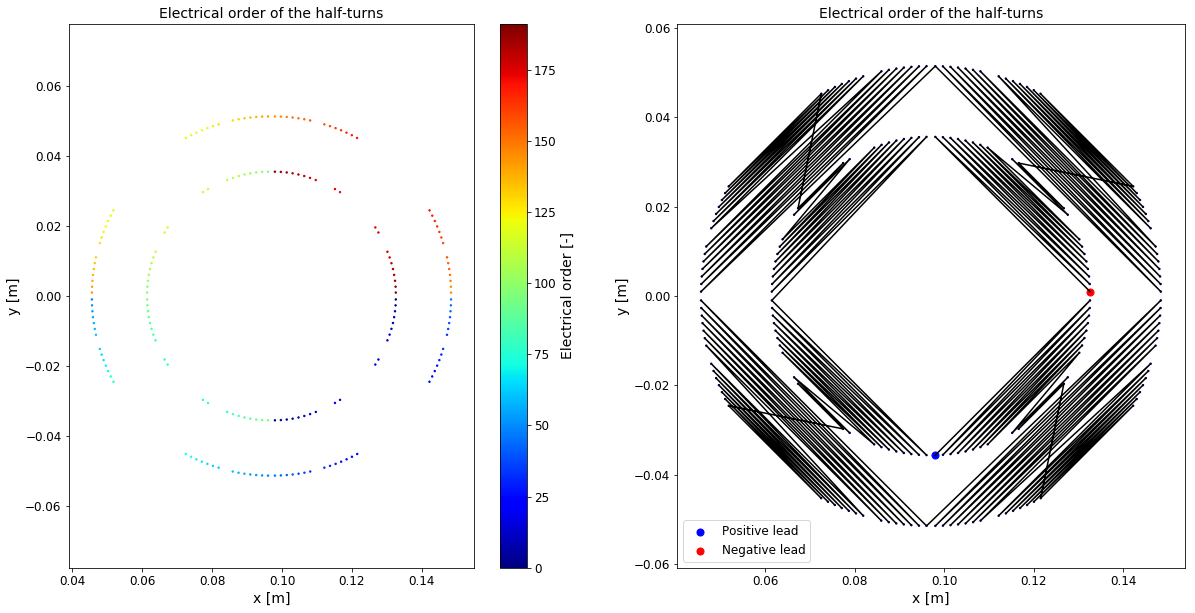

In [11]:
# Start and end indices of each group
indexTstop = np.cumsum(nT)
indexTstop = indexTstop.tolist()
indexTstart = [1]
for i in range(len(nT)-1):
    indexTstart.extend([indexTstart[i] + nT[i]])

# # Fake electrical order
# el_order_half_turns = []
# for i in range(1,nHalfTurnsDefined+1):
#     el_order_half_turns.append(i)

# Calculation of the electrical order of the half-turns
# Pairs of groups whose half-turns are electrically connect (go and return lines)
elPairs_GroupTogether = [ [15,31], [16,32], [14,30], [13,29], [25,9], [26,10], [28,12], [27,11], [7,23], [8,24], [6,22], [5,21], [17,1], [18,2], [20,4], [19,3] ]
# For each pair of groups, this flag determines whether the half-turns are electrically connected following LEDET order, or its inverse
elPairs_RevElOrder = [ 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1]
nElPairs=len(elPairs_GroupTogether);

print('The half-turns of these pairs of groups will be connected electrically:')
print(elPairs_GroupTogether)

if len(elPairs_RevElOrder)!=nElPairs:
    error('Length of the vector elPairs_RevElOrder should be equal to nElPairs.')

el_order_half_turns=[];
for p in range(nElPairs):
    if nT[elPairs_GroupTogether[p][0]-1]!=nT[elPairs_GroupTogether[p][1]-1]:
        error('Pair of groups defined by the variable elPairs_GroupTogether must have the same number of half-turns.')
    for k in range(nT[elPairs_GroupTogether[p][0]-1]):
        if elPairs_RevElOrder[p]==0:
            el_order_half_turns.append( indexTstart[elPairs_GroupTogether[p][0]-1]+k );
            el_order_half_turns.append( indexTstart[elPairs_GroupTogether[p][1]-1]+k );
        if elPairs_RevElOrder[p]==1:
            el_order_half_turns.append( indexTstop[elPairs_GroupTogether[p][0]-1]-k );
            el_order_half_turns.append( indexTstop[elPairs_GroupTogether[p][1]-1]-k );

el_order_half_turns_Array = np.int_(el_order_half_turns)

el_order_half_turns2 = [87,183,88,184,89,185,90,186,91,187,92,188,93,189,94,190,95,191,96,192,86,182,85,181,84,180,83,179,82,178,81,177,80,176,79,175,78,174,77,173,76,172,75,171,74,170,73,169,145,49,146,50,147,51,148,52,149,53,150,54,151,55,152,56,153,57,154,58,155,59,156,60,157,61,158,62,168,72,167,71,166,70,165,69,164,68,163,67,162,66,161,65,160,64,159,63,39,135,40,136,41,137,42,138,43,139,44,140,45,141,46,142,47,143,48,144,38,134,37,133,36,132,35,131,34,130,33,129,32,128,31,127,30,126,29,125,28,124,27,123,26,122,25,121,97,1,98,2,99,3,100,4,101,5,102,6,103,7,104,8,105,9,106,10,107,11,108,12,109,13,110,14,120,24,119,23,118,22,117,21,116,20,115,19,114,18,113,17,112,16,111,15]
# el_order_half_turns_Array2 = np.int_(el_order_half_turns2)

 #print(el_order_half_turns-el_order_half_turns2)

# Plot
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.scatter(x_ave, y_ave, s=2, c=np.argsort(el_order_half_turns_Array))
plt.xlabel('x [m]',**selectedFont)
plt.ylabel('y [m]',**selectedFont)
plt.title('Electrical order of the half-turns',**selectedFont)
plt.set_cmap('jet')
cbar = plt.colorbar()
cbar.set_label('Electrical order [-]',**selectedFont)
plt.rcParams.update({'font.size': 12})
plt.axis('equal')
# Plot
plt.subplot(1, 2, 2)
plt.plot(x_ave[el_order_half_turns_Array-1],y_ave[el_order_half_turns_Array-1],'k')
plt.scatter(x_ave, y_ave, s=2, c=nS)
plt.scatter(x_ave[el_order_half_turns_Array[0]-1], y_ave[el_order_half_turns_Array[0]-1], s=50, c='b', label='Positive lead')
plt.scatter(x_ave[el_order_half_turns_Array[-1]-1], y_ave[el_order_half_turns_Array[-1]-1], s=50, c='r', label='Negative lead')
plt.xlabel('x [m]',**selectedFont)
plt.ylabel('y [m]',**selectedFont)
plt.title('Electrical order of the half-turns',**selectedFont)
plt.rcParams.update({'font.size': 12})
plt.axis('equal')
plt.legend(loc='lower left')



# el_order_half_turns = [87,183,88,184,89,185,90,186,91,187,92,188,93,189,94,190,95,191,96,192,86,182,85,181,84,180,83,179,82,178,81,177,80,176,79,175,78,174,77,173,76,172,75,171,74,170,73,169,145,49,146,50,147,51,148,52,149,53,150,54,151,55,152,56,153,57,154,58,155,59,156,60,157,61,158,62,168,72,167,71,166,70,165,69,164,68,163,67,162,66,161,65,160,64,159,63,39,135,40,136,41,137,42,138,43,139,44,140,45,141,46,142,47,143,48,144,38,134,37,133,36,132,35,131,34,130,33,129,32,128,31,127,30,126,29,125,28,124,27,123,26,122,25,121,97,1,98,2,99,3,100,4,101,5,102,6,103,7,104,8,105,9,106,10,107,11,108,12,109,13,110,14,120,24,119,23,118,22,117,21,116,20,115,19,114,18,113,17,112,16,111,15]


print('Calculated electrical order of the half-turns:')
print('el_order_half_turns = ' + str(el_order_half_turns))

# Cable geometry parameters (NOT DONE AUTOMATICALLY - PLACEHOLDER)

In [12]:
# Inclination of cables with respect to X axis (including transformations for mirror and rotation)
alphasDEG = [0,0.3994,0.7988,1.1981,1.5975,1.9969,2.3963,2.7957,3.195,3.5944,3.9938,4.3932,4.7926,5.192,5.5913,5.9907,20.8049,21.2043,21.6037,22.003,22.4024,22.8018,23.6006,23.9999,24.3993,24.7987,25.1981,0,0.3994,0.7988,1.1981,1.5975,1.9969,2.3963,3.195,3.5944,3.9938,4.3932,4.7926,5.192,5.5913,5.9907,6.3901,24.3994,24.7988,25.1981,25.5975,0,0.3994,0.7988,1.1981,1.5975,1.9969,2.3963,2.7957,3.195,3.5944,3.9938,4.3932,4.7926,5.192,5.5913,5.9907,20.8049,21.2043,22.003,22.4024,22.8018,23.2012,23.6006,23.9999,24.3993,24.7987,25.1981,0,0.3994,0.7988,1.1981,1.5975,1.9969,2.3963,2.7957,3.195,3.5944,3.9938,4.3932,4.7926,5.5913,5.9907,6.3901,24,24.3994,24.7988,25.1981,25.5975,0,0.3994,0.7988,1.1981,1.5975,1.9969,2.3963,2.7957,3.195,3.5944,3.9938,4.3932,4.7926,5.192,5.9907,20.8049,21.2043,21.6037,22.003,22.4024,22.8018,23.2012,23.6006,23.9999,24.3993,24.7987,25.1981,0,0.3994,0.7988,1.1981,1.5975,1.9969,2.3963,2.7957,3.195,3.9938,4.3932,4.7926,5.192,5.5913,5.9907,6.3901,24,24.3994,24.7988,25.1981,25.5975,0,0.3994,0.7988,1.1981,1.5975,1.9969,2.3963,2.7957,3.195,3.5944,4.3932,4.7926,5.192,5.5913,5.9907,20.8049,21.2043,21.6037,22.003,22.4024,22.8018,23.2012,23.6006,23.9999,24.3993,24.7987,25.1981,0,0.3994,0.7988,1.1981,1.5975,2.3963,2.7957,3.195,3.5944,3.9938,4.3932,4.7926,5.192,5.5913,5.9907,6.3901,24,24.3994,24.7988,25.1981,25.5975,0]
# Rotate cable by a certain angle [deg]
rotation_block = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,0]
# Mirror cable along the bisector of its quadrant (0=no, 1=yes)
mirror_block = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]
# Mirror cable along the Y axis (0=no, 1=yes)
mirrorY_block = nHalfTurnsDefined * [0]


# Heat exchange between half-turns (NOT DONE AUTOMATICALLY: along the cable narrow side)

In [13]:
# Pairs of half-turns exchanging heat along the cable wide side
iContactAlongWidth_From = [1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,46,47,49,50,51,52,53,54,55,56,57,58,59,60,61,63,64,65,66,67,68,69,70,71,73,74,75,76,77,78,79,80,81,82,83,84,85,87,88,89,90,91,92,93,94,95,97,98,99,100,101,102,103,104,105,106,107,108,109,111,112,113,114,115,116,117,118,119,121,122,123,124,125,126,127,128,129,130,131,132,133,135,136,137,138,139,140,141,142,143,145,146,147,148,149,150,151,152,153,154,155,156,157,159,160,161,162,163,164,165,166,167,169,170,171,172,173,174,175,176,177,178,179,180,181,183,184,185,186,187,188,189,190,191]
iContactAlongWidth_To = [2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,43,44,45,46,47,48,50,51,52,53,54,55,56,57,58,59,60,61,62,64,65,66,67,68,69,70,71,72,74,75,76,77,78,79,80,81,82,83,84,85,86,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,109,110,112,113,114,115,116,117,118,119,120,122,123,124,125,126,127,128,129,130,131,132,133,134,136,137,138,139,140,141,142,143,144,146,147,148,149,150,151,152,153,154,155,156,157,158,160,161,162,163,164,165,166,167,168,170,171,172,173,174,175,176,177,178,179,180,181,182,184,185,186,187,188,189,190,191,192]

for g in range(nGroupsDefined):
    iContactAlongWidth_From.extend( range(indexTstart[g], indexTstop[g]) )
    iContactAlongWidth_To.extend( range(indexTstart[g]+1, indexTstop[g]+1) )

print('Heat exchange along the cable wide side - Calculated indices:')
print('iContactAlongWidth_From = ')
print(iContactAlongWidth_From)
print('iContactAlongWidth_To = ')
print(iContactAlongWidth_To)

# NOT DONE AUTOMATICALLY
# Pairs of half-turns exchanging heat along the cable narrow side
iContactAlongHeight_From = [1,2,3,4,5,6,7,8,9,14,25,26,27,28,29,30,31,32,33,38,49,50,51,52,53,54,55,56,57,62,73,74,75,76,77,78,79,80,81,86,97,98,99,100,101,102,103,104,105,110,121,122,123,124,125,126,127,128,129,134,145,146,147,148,149,150,151,152,153,158,169,170,171,172,173,174,175,176,177,182]
iContactAlongHeight_To = [15,16,17,18,18,19,20,22,22,23,39,40,41,42,42,43,44,46,46,47,63,64,65,66,66,67,68,70,70,71,87,88,89,90,90,91,92,94,94,95,111,112,113,114,114,115,116,118,118,119,135,136,137,138,138,139,140,142,142,143,159,160,161,162,162,163,164,166,166,167,183,184,185,186,186,187,188,190,190,191]
print('Heat exchange along the cable wide side - Calculated indices:')
print('iContactAlongHeight_From = ')
print(iContactAlongHeight_From)
print('iContactAlongHeight_To = ')
print(iContactAlongHeight_To)


Heat exchange along the cable wide side - Calculated indices:
iContactAlongWidth_From = 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 159, 160, 161, 162, 163, 164, 165, 166, 167, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 39, 40, 41

# Quench initiation calculation: Force selected half-turns to quench

In [14]:
# Choose one of the two following options: Fully 2D model, or Experimental 2D+1D model

# # # # Fully 2D model
# # Indices of the half-turns that are set to quench at a given time
# iStartQuench = [100]
# # Time at which each selected half-turn quenches [s]
# tStartQuench = [-0.015]
# # Length of the initial hot-spot [m] (it can be set to a large value to implement a full 2D model)
# lengthHotSpot_iStartQuench = [l_magnet]
# # Quench propagation velocity [m/s] (you can write 2x higher velocity if the quench propagates in two directions)
# vQ_iStartQuench = [99999]

# # # Experimental 2D + 1D model
# In this example, only one half-turn is quenched (#100). When it quenches at time tStartQuench, the half-turn electrical resistance will be calculated using an initial quenched length of lengthHotSpot_iStartQuench, increasing with velocity vQ_iStartQuench
# When the quench propagates to the three adjacent half-turns (#97-99), their resistances will also be calculated using an initial quenched length of lengthHotSpot_iStartQuench, increasing with velocity vQ_iStartQuench
# When any other half-turn in the model quenches, its resistance will be calculated using the full magnetic length.
# Indices of the half-turns that are set to quench at a given time
iStartQuench = [24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192]
# Time at which each selected half-turn quenches [s]
tStartQuench = [1.942,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999]
# Length of the initial hot-spot [m] (it can be set to a large value to implement a full 2D model)
lengthHotSpot_iStartQuench = [0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85]
# Quench propagation velocity [m/s] (you can write 2x higher velocity if the quench propagates in two directions)
vQ_iStartQuench = [16.67,16.67,16.67,16.67,16.67,16.67,16.67,16.67,16.67,16.67,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33,1033.33]

# fraction of helium in the cable [-] (used only for the beta version of LEDET for the MQ validation)
overwrite_f_internalVoids_inGroup = [0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035]

overwrite_f_externalVoids_inGroup = nHalfTurnsDefined*[0.061451746026995+(0.054983141182048-overwrite_f_internalVoids_inGroup[1])]



# Fraction of Helium: Used within the beta version of the MQ input file

In [15]:
#overwrite_f_internalVoids_inGroup = [0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035]


#print(overwrite_f_internalVoids_inGroup)


#overwrite_f_externalVoids_inGroup = nHalfTurnsDefined*[0.061451746026995+(0.054983141182048-overwrite_f_internalVoids_inGroup[1])]


#print(overwrite_f_externalVoids_inGroup)




# Electrical circuit during powering transient
<img src="LEDET_CircuitSchematic_Powering.png" width="750"/>


# Electrical circuit during protection transient
<img src="LEDET_CircuitSchematic_Protection.png" width="750"/>

# Circuit warm resistance and power-supply crowbar

In [16]:
# Resistance of the warm parts of the circuit [Ohm]
R_circuit = 0.0000
# Resistance of crowbar of the power supply [Ohm]
R_crowbar = 0.0000
# Forward voltage drop of a diode or thyristor in the crowbar of the power supply [V]
Ud_crowbar = 0.0

# Power supply control

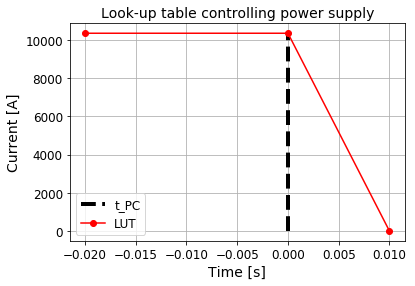

In [17]:
# Time when the power supply is switched off and the crowbar is switched on [s]
t_PC = 0
# LUT controlling power supply, Time [s]
t_PC_LUT = [-0.02, t_PC, t_PC+0.01]
# LUT controlling power supply, Current [A]
I_PC_LUT = [I00, I00, 0]

# Plot
plt.plot([t_PC,t_PC], [np.min(I_PC_LUT),np.max(I_PC_LUT)], 'k--', linewidth=4.0, label='t_PC')
plt.plot(t_PC_LUT, I_PC_LUT, 'ro-', label='LUT')
plt.xlabel('Time [s]',**selectedFont)
plt.ylabel('Current [A]',**selectedFont)
plt.title('Look-up table controlling power supply',**selectedFont)
plt.grid(True)
plt.rcParams.update({'font.size': 12})
plt.legend(loc='lower left')

# Energy-extraction system

In [18]:
# Time when the energy-extraction system is triggered [s]
tEE = 2.08-1.98
# Resistance of the energy-extraction system [Ohm]
R_EE_triggered = 6.85E-3

# CLIQ system

In [19]:
# Time when the CLIQ system is triggered [s]
tCLIQ = 9999
# Direction of the introduced current change for the chosen CLIQ configuration
directionCurrentCLIQ = nCoilSectionsDefined * [1]
# Number of CLIQ units
nCLIQ = 1
# CLIQ charging voltage [V]
U0 = 1000
# Capacitance of the CLIQ capacitor bank [F]
C = 0.04
# Resistance of the CLIQ leads [Ohm]
Rcapa = 0.05

# Quench heater system

In [20]:
# Number of quench heater strips to write in the file
nHeaterStripsType1 = 8

# Time at which the power supply connected to the QH strip is triggered (set to a very large value to avoid triggering).
tQH = nHeaterStripsType1 * [1.977]
# Charging voltage of the capacitor connected to the QH strip.
U0_QH = nHeaterStripsType1 * [112.5]
# Capacitance of the capacitor connected to the QH strip.
C_QH = nHeaterStripsType1 * [0.0564]
# Resistance of the warm leads of the QH strip discharge circuit.
R_warm_QH = nHeaterStripsType1 * [0.175]
# Width of the non-Cu-plated part of the the QH strip.
w_QH = nHeaterStripsType1 * [0.015]
# Height of the non-Cu-plated part of the QH strip.
h_QH = nHeaterStripsType1 * [2.5E-5]
# Thickness of the insulation layer between QH strip and coil insulation layer.
s_ins_QH = nHeaterStripsType1 * [7.5E-5]
# Thickness of the insulation layer between QH strip and the helium bath (or the collars); on this side, the QH strip is thermally connected to an infinite thermal sink at constant temperature.
s_ins_QH_He = nHeaterStripsType1 * [5E-4]
# Length of the QH strip.
l_QH = nHeaterStripsType1 * [3.1]
# Fraction of QH strip covered by heating stations (not-Cu-plated).
f_QH = nHeaterStripsType1 * [0.27272727273]

# Add second type of quench heater strips
#nHeaterStripsType2 = 8
#tQH.extend( nHeaterStripsType2 * [0.0005] )
#U0_QH.extend( nHeaterStripsType2 * [450] )
#C_QH.extend( nHeaterStripsType2 * [14.1E-3] )
#R_warm_QH.extend( nHeaterStripsType2 * [0.29] )
#w_QH.extend( nHeaterStripsType2 * [20E-3] )
#h_QH.extend( nHeaterStripsType2 * [25E-6] )
#s_ins_QH.extend( nHeaterStripsType2 * [50E-6] )
#s_ins_QH_He.extend( nHeaterStripsType2 * [150E-6] )
#l_QH.extend( nHeaterStripsType2 * [7.81] )
#f_QH.extend( nHeaterStripsType2 * [0.352112676] )


# Thermal connections between heater strips and half-turns
iQH_toHalfTurn_From = [1,1,1,1,1,1,1,2,2,2,2,2,2,2,3,3,3,3,3,3,3,4,4,4,4,4,4,4,5,5,5,5,5,5,5,6,6,6,6,6,6,6,7,7,7,7,7,7,7,8,8,8,8,8,8,8]
iQH_toHalfTurn_To = [8,9,10,11,12,13,14,32,33,34,35,36,37,38,56,57,58,59,60,61,62,80,81,82,83,84,85,86,104,105,106,107,108,109,110,128,129,130,131,132,133,134,152,153,154,155,156,157,158,176,177,178,179,180,181,182]

# Adiabatic hot-spot temperature calculation

In [21]:
# Time from which the adiabatic hot-spot temperature calculation starts. For each coil section, calculate the adiabatic hot-spot temperature in the highest-field strand/cable [s]
tQuench = nCoilSectionsDefined * [1.942]
# Initial quench temperature in the hot-spot temperature calculation [K]
initialQuenchTemp = nCoilSectionsDefined * [10]
# Time-stepping used in the hot-spot temperature calculation [s]
tStepHotSpotT = nCoilSectionsDefined * [100E-6]

# Self-mutual inductance matrix between half-turns, and between coil sections

In [32]:
# Self-mutual inductance calculation, using SMIC (https://cernbox.cern.ch/index.php/s/37F87v3oeI2Gkp3)
flag_strandCorrection = 0
flag_sumTurnToTurn = 1
flag_writeOutput = 0

# Calculate group to which each half-turn belongs
indexTstart = np.hstack([1, 1+np.cumsum(nT[:-1])]);
indexTstop = np.cumsum(nT);
HalfTurnToGroup = np.zeros((1, nHalfTurnsDefined), dtype=int)
HalfTurnToGroup = HalfTurnToGroup[0]
HalfTurnToCoilSection = np.zeros((1, nHalfTurnsDefined), dtype=int)
HalfTurnToCoilSection = HalfTurnToCoilSection[0]
for g in range(1,nGroupsDefined+1):
    HalfTurnToGroup[indexTstart[g-1]-1:indexTstop[g-1]] = g
    HalfTurnToCoilSection[indexTstart[g-1]-1:indexTstop[g-1]]=GroupToCoilSection[g-1]

# Calculate group to which each strand belongs
indexSstart = np.hstack([1, 1+np.cumsum(nS[:-1])]);
indexSstop = np.cumsum(nS);
StrandToGroup = np.zeros((1, nStrands), dtype=int)
StrandToGroup = StrandToGroup[0]
StrandToCoilSection = np.zeros((1, nStrands), dtype=int)
StrandToCoilSection = StrandToCoilSection[0]
for ht in range(1,nHalfTurnsDefined+1):
    StrandToGroup[indexSstart[ht-1]-1:indexSstop[ht-1]] = HalfTurnToGroup[ht-1]
    StrandToCoilSection[indexSstart[ht-1]-1:indexSstop[ht-1]]=HalfTurnToCoilSection[ht-1]

# Calculate diameter of each strand
Ds = np.zeros((1, nStrands), dtype=float)
Ds = Ds[0]
for g in range(1,nGroupsDefined+1):
    Ds[np.where(StrandToGroup==g)] = ds_inGroup[g-1]

# Calculate self-mutual inductances
calculatedM = utils.calculateInductanceOneForLoop(x, y, polarities, nS, Ds, strandToHalfTurn, StrandToCoilSection, flag_strandCorrection, flag_sumTurnToTurn, flag_writeOutput)
# Self-mutual inductances between coil sections, per unit length [H/m]
M_m = calculatedM[2]
# Self-mutual inductances between turns, per unit length [H/m]
M_InductanceBlock_m = calculatedM[1]
# Total magnet self-mutual inductance, per unit length [H/m]
L_mag0 = calculatedM[3]

print('')
print('Total magnet self-inductance per unit length: ' + str(L_mag0) + ' H/m')

# Defining to which inductive block each half-turn belongs
HalfTurnToInductanceBlock = range(1, int(nHalfTurnsDefined/2+1)) 
HalfTurnToInductanceBlock = []
for i in range(2):
    for j in range(1, int(nHalfTurnsDefined/2+1)):
        HalfTurnToInductanceBlock.append(j)

Self-mutual inductance between strands - Calculation started
Calculation does not include correction for strand diameter.
Status: [------------------->] 100%
Self-mutual inductance between strands - Calculation finished
Self-mutual inductance between half-turns - Calculation started
Status: [------------------->] 100%
Self-mutual inductance between half-turns - Calculation finished
Self-mutual inductance between turns - Calculation finished
Self-mutual inductance between coil sections - Calculation finished

Total magnet self-inductance per unit length: 0.0016473418742236805 H/m


# Differential inductance versus current (Iron-yoke effect) - IMPORT FROM ROXIE

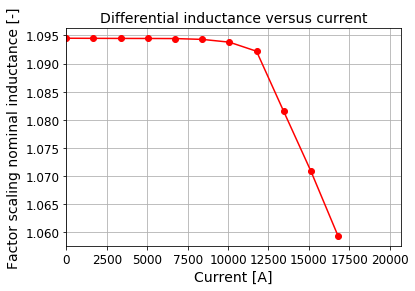

In [23]:
# Copy/paste the values after calculation using ROXIE or COMSOL or another software
fL_I = [0.001,1680.001,3360.001,5040.001,6720.001,8400.001,10080.001,11760.001,13440.001,15120.001,16800.001]
fL_L = [1.094488428,1.094472158,1.09445705,1.094447852,1.094431344,1.094286123,1.09379243,1.092182888,1.081505032,1.070900512,1.059381705]

# Plot
plt.plot(fL_I, fL_L, 'ro-')
plt.xlabel('Current [A]',**selectedFont)
plt.ylabel('Factor scaling nominal inductance [-]',**selectedFont)
plt.title('Differential inductance versus current',**selectedFont)
plt.xlim([0, I00*2])
plt.grid(True)
plt.rcParams.update({'font.size': 12})

# Time Vector Definition

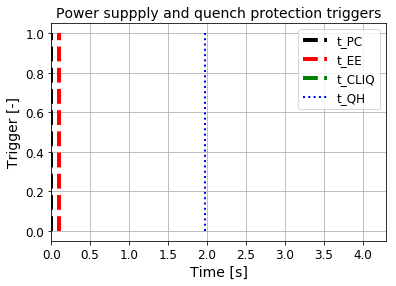

In [24]:
# Time Vector Definition. Parameters used to generate the time vector.
# Each triplet of numbers defines a time window: first element is the start time, second element is the time step in that window, third element is the end time. It must contain a number of elements multiple of 3. Any time point above t=1000 s will be ignored.
time_vector_params = [0.00E+00,1.00E-03,1.90E+00,1.90E+00,1.00E-04,2.20E+00,2.20E+00,1.00E-04,2.40E+00,2.40E+00,1.00E-04,2.70E+00,2.7001,0.0001,3.2,3.2001,0.0001,3.8,3.8001,0.0001,4.3]

# Plot
plt.plot([t_PC,t_PC], [0,1], 'k--', linewidth=4.0, label='t_PC')
plt.plot([tEE,tEE], [0,1], 'r--', linewidth=4.0, label='t_EE')
plt.plot([tCLIQ,tCLIQ], [0,1], 'g--', linewidth=4.0, label='t_CLIQ')
plt.plot([np.min(tQH),np.min(tQH)], [0,1], 'b:', linewidth=2.0, label='t_QH')
plt.xlabel('Time [s]',**selectedFont)
plt.ylabel('Trigger [-]',**selectedFont)
plt.xlim([1E-4,time_vector_params[-1]])
plt.title('Power suppply and quench protection triggers',**selectedFont)
plt.grid(True)
plt.rcParams.update({'font.size': 12})
plt.legend(loc='best')

# Options - Change something only if you know what you're doing

In [25]:
# Field-Map Files Options
Iref = I00
flagIron = 1
flagSelfField = 1
headerLines = 1
columnsXY = [4, 5]
columnsBxBy = [6, 7]
flagPlotMTF = 0

# Input Generation Options
flag_calculateInductanceMatrix = 0
flag_useExternalInitialization = 0
flag_initializeVar = 0

# Simulation Run Options
flag_fastMode = 1
flag_controlCurrent = 0

# Simulation Physics Options
flag_IronSaturation = 1
flag_InvertCurrentsAndFields = 0
flag_ScaleDownSuperposedMagneticField = 1
flag_HeCooling = 0
fScaling_Pex = 1
fScaling_Pex_AlongHeight = fScaling_Pex_AlongHeight_Defined
fScaling_MR = 1
flag_scaleCoilResistance_StrandTwistPitch = 2
flag_separateInsulationHeatCapacity = 0
flag_ISCL = 0
fScaling_Mif = 1
fScaling_Mis = 0
flag_StopIFCCsAfterQuench = 0
flag_StopISCCsAfterQuench = 1
tau_increaseRif = 0.01
tau_increaseRis = 0.01
fScaling_RhoSS = 1.0
maxVoltagePC = 1E6
flag_symmetricGroundingEE = 0
flag_removeUc = 0
BtX_background = 0
BtY_background = 0

# Post-Processing Options
flag_showFigures = 0
flag_saveFigures = 0
flag_saveMatFile = 1
flag_saveTxtFiles = 0
flag_generateReport = 1
flag_hotSpotTemperatureInEachGroup = 0
MinMaxXY_MTF = [-120, 120, -120, 120]

In [26]:
# Add all Inputs variables to a list
variableGroupInputs = []
variableGroupInputs.append(('T00', T00))
variableGroupInputs.append(('l_magnet', l_magnet))
variableGroupInputs.append(('I00', I00))
variableGroupInputs.append('')
variableGroupInputs.append(('M_m', M_m))
variableGroupInputs.append('')
variableGroupInputs.append(('fL_I', fL_I))
variableGroupInputs.append(('fL_L', fL_L))
variableGroupInputs.append('')
variableGroupInputs.append(('GroupToCoilSection', GroupToCoilSection))
variableGroupInputs.append(('polarities_inGroup', polarities_inGroup))
variableGroupInputs.append(('nT',nT))
variableGroupInputs.append(('nStrands_inGroup',nStrands_inGroup))
variableGroupInputs.append(('l_mag_inGroup',l_mag_inGroup))
variableGroupInputs.append(('ds_inGroup',ds_inGroup))
variableGroupInputs.append(('f_SC_strand_inGroup',f_SC_strand_inGroup))
variableGroupInputs.append(('f_ro_eff_inGroup',f_ro_eff_inGroup))
variableGroupInputs.append(('Lp_f_inGroup',Lp_f_inGroup))
variableGroupInputs.append(('RRR_Cu_inGroup',RRR_Cu_inGroup))
variableGroupInputs.append(('SCtype_inGroup',SCtype_inGroup))
variableGroupInputs.append(('STtype_inGroup',STtype_inGroup))
variableGroupInputs.append(('insulationType_inGroup',insulationType_inGroup))
variableGroupInputs.append(('internalVoidsType_inGroup',internalVoidsType_inGroup))
variableGroupInputs.append(('externalVoidsType_inGroup',externalVoidsType_inGroup))
variableGroupInputs.append(('wBare_inGroup',wBare_inGroup))
variableGroupInputs.append(('hBare_inGroup',hBare_inGroup))
variableGroupInputs.append(('wIns_inGroup',wIns_inGroup))
variableGroupInputs.append(('hIns_inGroup',hIns_inGroup))
variableGroupInputs.append(('Lp_s_inGroup',Lp_s_inGroup))
variableGroupInputs.append(('R_c_inGroup',R_c_inGroup))
variableGroupInputs.append(('Tc0_NbTi_ht_inGroup',Tc0_NbTi_ht_inGroup))
variableGroupInputs.append(('Bc2_NbTi_ht_inGroup',Bc2_NbTi_ht_inGroup))
variableGroupInputs.append(('c1_Ic_NbTi_inGroup',c1_Ic_NbTi_inGroup))
variableGroupInputs.append(('c2_Ic_NbTi_inGroup',c2_Ic_NbTi_inGroup))
variableGroupInputs.append(('Tc0_Nb3Sn_inGroup',Tc0_Nb3Sn_inGroup))
variableGroupInputs.append(('Bc2_Nb3Sn_inGroup',Bc2_Nb3Sn_inGroup))
variableGroupInputs.append(('Jc_Nb3Sn0_inGroup',Jc_Nb3Sn0_inGroup))
variableGroupInputs.append('')
variableGroupInputs.append(('el_order_half_turns',el_order_half_turns))
variableGroupInputs.append('')
variableGroupInputs.append(('alphasDEG',alphasDEG))
variableGroupInputs.append(('rotation_block',rotation_block))
variableGroupInputs.append(('mirror_block',mirror_block))
variableGroupInputs.append(('mirrorY_block',mirrorY_block))
variableGroupInputs.append('')
variableGroupInputs.append(('iContactAlongWidth_From',iContactAlongWidth_From))
variableGroupInputs.append(('iContactAlongWidth_To',iContactAlongWidth_To))
variableGroupInputs.append(('iContactAlongHeight_From',iContactAlongHeight_From))
variableGroupInputs.append(('iContactAlongHeight_To',iContactAlongHeight_To))
variableGroupInputs.append('')
variableGroupInputs.append(('iStartQuench',iStartQuench))
variableGroupInputs.append(('tStartQuench',tStartQuench))
variableGroupInputs.append(('lengthHotSpot_iStartQuench',lengthHotSpot_iStartQuench))
variableGroupInputs.append(('vQ_iStartQuench',vQ_iStartQuench))
variableGroupInputs.append(('overwrite_f_internalVoids_inGroup',overwrite_f_internalVoids_inGroup))
variableGroupInputs.append(('overwrite_f_externalVoids_inGroup',overwrite_f_externalVoids_inGroup))
variableGroupInputs.append('')
variableGroupInputs.append(('R_circuit',R_circuit))
variableGroupInputs.append(('R_crowbar',R_crowbar))
variableGroupInputs.append(('Ud_crowbar',Ud_crowbar))
variableGroupInputs.append('')
variableGroupInputs.append(('t_PC',t_PC))
variableGroupInputs.append(('t_PC_LUT',t_PC_LUT))
variableGroupInputs.append(('I_PC_LUT',I_PC_LUT))
variableGroupInputs.append('')
variableGroupInputs.append(('tEE',tEE))
variableGroupInputs.append(('R_EE_triggered',R_EE_triggered))
variableGroupInputs.append('')
variableGroupInputs.append(('tCLIQ',tCLIQ))
variableGroupInputs.append(('directionCurrentCLIQ',directionCurrentCLIQ))
variableGroupInputs.append(('nCLIQ',nCLIQ))
variableGroupInputs.append(('U0',U0))
variableGroupInputs.append(('C',C))
variableGroupInputs.append(('Rcapa',Rcapa))
variableGroupInputs.append('')
variableGroupInputs.append(('tQH',tQH))
variableGroupInputs.append(('U0_QH',U0_QH))
variableGroupInputs.append(('C_QH',C_QH))
variableGroupInputs.append(('R_warm_QH',R_warm_QH))
variableGroupInputs.append(('w_QH',w_QH))
variableGroupInputs.append(('h_QH',h_QH))
variableGroupInputs.append(('s_ins_QH',s_ins_QH))
variableGroupInputs.append(('s_ins_QH_He',s_ins_QH_He))
variableGroupInputs.append(('l_QH',l_QH))
variableGroupInputs.append(('f_QH',f_QH))
variableGroupInputs.append(('iQH_toHalfTurn_From',iQH_toHalfTurn_From))
variableGroupInputs.append(('iQH_toHalfTurn_To',iQH_toHalfTurn_To))
variableGroupInputs.append('')
variableGroupInputs.append(('tQuench',tQuench))
variableGroupInputs.append(('initialQuenchTemp',initialQuenchTemp))
variableGroupInputs.append(('tStepHotSpotT',tStepHotSpotT))
variableGroupInputs.append('')
variableGroupInputs.append(('HalfTurnToInductanceBlock',HalfTurnToInductanceBlock))
variableGroupInputs.append(('M_InductanceBlock_m',M_InductanceBlock_m))

In [27]:
# Add all Options variables to a list
variableGroupOptions = []
variableGroupOptions.append(('time_vector_params', time_vector_params))
variableGroupOptions.append('')
variableGroupOptions.append(('Iref',Iref))
variableGroupOptions.append(('flagIron',flagIron))
variableGroupOptions.append(('flagSelfField',flagSelfField))
variableGroupOptions.append(('headerLines',headerLines))
variableGroupOptions.append(('columnsXY',columnsXY))
variableGroupOptions.append(('columnsBxBy',columnsBxBy))
variableGroupOptions.append(('flagPlotMTF',flagPlotMTF))
variableGroupOptions.append('')
variableGroupOptions.append(('flag_calculateInductanceMatrix',flag_calculateInductanceMatrix))
variableGroupOptions.append(('flag_useExternalInitialization',flag_useExternalInitialization))
variableGroupOptions.append(('flag_initializeVar',flag_initializeVar))
variableGroupOptions.append('')
variableGroupOptions.append(('flag_fastMode',flag_fastMode))
variableGroupOptions.append(('flag_controlCurrent',flag_controlCurrent))
variableGroupOptions.append('')
variableGroupOptions.append(('flag_IronSaturation',flag_IronSaturation))
variableGroupOptions.append(('flag_InvertCurrentsAndFields',flag_InvertCurrentsAndFields))
variableGroupOptions.append(('flag_ScaleDownSuperposedMagneticField',flag_ScaleDownSuperposedMagneticField))
variableGroupOptions.append(('flag_HeCooling',flag_HeCooling))
variableGroupOptions.append(('fScaling_Pex',fScaling_Pex))
variableGroupOptions.append(('fScaling_Pex_AlongHeight',fScaling_Pex_AlongHeight))
variableGroupOptions.append(('fScaling_MR',fScaling_MR))
variableGroupOptions.append(('flag_scaleCoilResistance_StrandTwistPitch',flag_scaleCoilResistance_StrandTwistPitch))
variableGroupOptions.append(('flag_separateInsulationHeatCapacity',flag_separateInsulationHeatCapacity))
variableGroupOptions.append(('flag_ISCL',flag_ISCL))
variableGroupOptions.append(('fScaling_Mif',fScaling_Mif))
variableGroupOptions.append(('fScaling_Mis',fScaling_Mis))
variableGroupOptions.append(('flag_StopIFCCsAfterQuench',flag_StopIFCCsAfterQuench))
variableGroupOptions.append(('flag_StopISCCsAfterQuench',flag_StopISCCsAfterQuench))
variableGroupOptions.append(('tau_increaseRif',tau_increaseRif))
variableGroupOptions.append(('tau_increaseRis',tau_increaseRis))
variableGroupOptions.append(('fScaling_RhoSS',fScaling_RhoSS))
variableGroupOptions.append(('maxVoltagePC',maxVoltagePC))
variableGroupOptions.append(('flag_symmetricGroundingEE',flag_symmetricGroundingEE))
variableGroupOptions.append(('flag_removeUc',flag_removeUc))
variableGroupOptions.append(('BtX_background',BtX_background))
variableGroupOptions.append(('BtY_background',BtY_background))
variableGroupOptions.append('')
variableGroupOptions.append(('flag_showFigures',flag_showFigures))
variableGroupOptions.append(('flag_saveFigures',flag_saveFigures))
variableGroupOptions.append(('flag_saveMatFile',flag_saveMatFile))
variableGroupOptions.append(('flag_saveTxtFiles',flag_saveTxtFiles))
variableGroupOptions.append(('flag_generateReport',flag_generateReport))
variableGroupOptions.append(('flag_hotSpotTemperatureInEachGroup',flag_hotSpotTemperatureInEachGroup))
variableGroupOptions.append(('MinMaxXY_MTF',MinMaxXY_MTF))

In [28]:
# Define the values of all Plots variables
suffixPlot = []
typePlot = []
outputPlotSubfolderPlot = []
variableToPlotPlot = []
selectedStrandsPlot = []
selectedTimesPlot = []
labelColorBarPlot = []
minColorBarPlot = []
maxColorBarPlot = []
MinMaxXYPlot = []
flagSavePlot = []
flagColorPlot = []
flagInvisiblePlot = []

# Add all Plots variables to a list
variableGroupPlots = []
variableGroupPlots.append(('typePlot',typePlot))
variableGroupPlots.append(('outputPlotSubfolderPlot',outputPlotSubfolderPlot))
variableGroupPlots.append(('variableToPlotPlot',variableToPlotPlot))
variableGroupPlots.append(('selectedStrandsPlot',selectedStrandsPlot))
variableGroupPlots.append(('selectedTimesPlot',selectedTimesPlot))
variableGroupPlots.append(('labelColorBarPlot',labelColorBarPlot))
variableGroupPlots.append(('minColorBarPlot',minColorBarPlot))
variableGroupPlots.append(('maxColorBarPlot',maxColorBarPlot))
variableGroupPlots.append(('MinMaxXYPlot',MinMaxXYPlot))
variableGroupPlots.append(('flagSavePlot',flagSavePlot))
variableGroupPlots.append(('flagColorPlot',flagColorPlot))
variableGroupPlots.append(('flagInvisiblePlot',flagInvisiblePlot))

In [29]:
# Define the values of all Variables variables
variableToSaveTxt = ['time_vector', 'Ia', 'Ib', 'T_ht', 'dT_dt_ht', 'flagQ_ht', 'IifX', 'IifY', 'Iis', 'dIifXDt', 'dIifYDt', 'dIisDt', 'Uc', 'U_QH', 'T_QH', 'time_vector', 'R_CoilSections', 'U_inductive_dynamic_CoilSections']
typeVariableToSaveTxt = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1]
variableToInitialize = ['Ia', 'Ib', 'T_ht', 'dT_dt_ht', 'flagQ_ht', 'IifX', 'IifY', 'Iis', 'dIifXDt', 'dIifYDt', 'dIisDt', 'Uc', 'U_QH', 'T_QH']

# Add all Variables variables to a list
variableGroupVariables = []
variableGroupVariables.append(('variableToSaveTxt',variableToSaveTxt))
variableGroupVariables.append(('typeVariableToSaveTxt',typeVariableToSaveTxt))
variableGroupVariables.append('')
variableGroupVariables.append(('variableToInitialize',variableToInitialize))

In [30]:
# Visualize variable descriptions, names, and values
print('### "Inputs" variables ###')
utils.printVariableDescNameValue(variableGroupInputs, variablesInputs)

# Visualize variable descriptions, names, and values
print('')
print('### "Options" variables ###')
utils.printVariableDescNameValue(variableGroupOptions, variablesOptions)

# Visualize variable descriptions, names, and values
print('')
print('### "Plots" variables ###')
utils.printVariableDescNameValue(variableGroupPlots, variablesPlots)

# Visualize variable descriptions, names, and values
print('')
print('### "Variables" variables ###')
utils.printVariableDescNameValue(variableGroupVariables, variablesVariables)

### "Inputs" variables ###
Initial temperature [K] T00 1.9
Magnetic length [m] l_magnet 3.1
Initial current [A] I00 10351
Self mutual inductance matrix [H/m] M_m [[0.00164734]]
Current levels at which the differential inductance is evaluated [A] fL_I [0.001, 1680.001, 3360.001, 5040.001, 6720.001, 8400.001, 10080.001, 11760.001, 13440.001, 15120.001, 16800.001]
Ratio between differential inductance at different current levels and nominal inductance fL_L [1.094488428, 1.094472158, 1.09445705, 1.094447852, 1.094431344, 1.094286123, 1.09379243, 1.092182888, 1.081505032, 1.070900512, 1.059381705]
Define the coil section where each group of cables is located GroupToCoilSection [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Polarity of the current in each group of strands polarities_inGroup [1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1]
Number of half-turns in each group nT [7,

In [31]:
# Initialize a workbook 
nameWorkbook = nameMagnet + '_1' + '.xlsx'
# book.save(nameWorkbook)
# book = xlwt.Workbook(encoding="utf-8")
workbook = xlsxwriter.Workbook(nameWorkbook)

print('IMPORTANT NOTICE: For the quench heaters the heat capacity function is changed from the one used initially in LEDET')
print('This was done to have it consistent with COMSOL and to validate both models (LEDET and COMSOL) ')
print('The version of LEDET including this changes is called: LEDET_v1_06_04_PATCH_NOT_OFFICIAL_20190404')



print('### Write "Inputs" sheet ###')
utils.writeLEDETInputsNew(workbook, "Inputs", variableGroupInputs, variablesInputs)

print('')
print('### Write "Options" sheet ###')
utils.writeLEDETInputsNew(workbook, "Options", variableGroupOptions, variablesOptions)

print('')
print('### Write "Plots" sheet ###')
utils.writeLEDETInputsNew(workbook, "Plots", variableGroupPlots, variablesPlots)

print('')
print('### Write "Variables" sheet ###')
utils.writeLEDETInputsNew(workbook, "Variables", variableGroupVariables, variablesVariables)
    
# Save the workbook
workbook.close()

# Displaytime stamp and  end run
currentDT = datetime.datetime.now()
print(' ')
print ('Time stamp: ' + str(currentDT))
print('New file ' + nameWorkbook + ' generated.')

IMPORTANT NOTICE: For the quench heaters the heat capacity function is changed from the one used initially in LEDET
This was done to have it consistent with COMSOL and to validate both models (LEDET and COMSOL) 
The version of LEDET including this changes is called: LEDET_v1_06_04_PATCH_NOT_OFFICIAL_20190404
### Write "Inputs" sheet ###
i=0, currentRow=0 - T00
i=1, currentRow=1 - l_magnet
i=2, currentRow=2 - I00
i=3, currentRow=3 - BLANK LINE
i=4, currentRow=4 - M_m
i=5, currentRow=5 - BLANK LINE
i=6, currentRow=6 - fL_I
i=7, currentRow=7 - fL_L
i=8, currentRow=8 - BLANK LINE
i=9, currentRow=9 - GroupToCoilSection
i=10, currentRow=10 - polarities_inGroup
i=11, currentRow=11 - nT
i=12, currentRow=12 - nStrands_inGroup
i=13, currentRow=13 - l_mag_inGroup
i=14, currentRow=14 - ds_inGroup
i=15, currentRow=15 - f_SC_strand_inGroup
i=16, currentRow=16 - f_ro_eff_inGroup
i=17, currentRow=17 - Lp_f_inGroup
i=18, currentRow=18 - RRR_Cu_inGroup
i=19, currentRow=19 - SCtype_inGroup
i=20, currentR